### 🥚계란 이진 분류

#### 📌각 폴더 별로 클래스 부여

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/egg/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size=(244, 244),
    batch_size=32,
    class_mode='binary'
)

print(generator.class_indices)

Found 794 images belonging to 2 classes.
{'Damaged': 0, 'NotDamaged': 1}


#### 📌File 확인

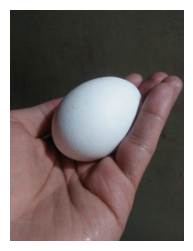

In [97]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(generator.filepaths[632]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

#### 📌DataFrame 변환 및 file_paths 수정 

In [81]:
import pandas as pd

df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
df.loc[:, 'file_paths'] = df.file_paths.apply(lambda x: x.replace('\\', '/'))
df

,file_paths,targets
0,./datasets/egg/original/Damaged/Damaged1.png,0
1,./datasets/egg/original/Damaged/Damaged10.png,0
2,./datasets/egg/original/Damaged/Damaged100.png,0
3,./datasets/egg/original/Damaged/Damaged101.png,0
4,./datasets/egg/original/Damaged/Damaged102.png,0
...,...,...
789,./datasets/egg/original/NotDamaged/Not Damaged...,1
790,./datasets/egg/original/NotDamaged/Not Damaged...,1
791,./datasets/egg/original/NotDamaged/Not Damaged...,1
792,./datasets/egg/original/NotDamaged/Not Damaged...,1


#### 📌예측 세트, 훈련 세트, 검증 세트 분리

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(df.file_paths, df.targets, stratify=df.targets, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_test.value_counts())

targets
0    505
1    130
Name: count, dtype: int64
targets
0    127
1     32
Name: count, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())

targets
0    404
1    104
Name: count, dtype: int64
targets
0    101
1     26
Name: count, dtype: int64


In [84]:
import shutil
import os

root = './datasets/egg/'

for file_path in X_train:
    egg_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + egg_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [85]:
import shutil

root = './datasets/egg/'

for file_path in X_val:
    egg_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + egg_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [86]:
import shutil

root = './datasets/egg/'

for file_path in X_test:
    egg_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + egg_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/egg/train/'
validation_dir = './datasets/egg/validation/'
test_dir = './datasets/egg/test/'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 508 images belonging to 2 classes.
Found 127 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
{'Damaged': 0, 'NotDamaged': 1}
{'Damaged': 0, 'NotDamaged': 1}
{'Damaged': 0, 'NotDamaged': 1}


In [17]:
# 📌Cycle 1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)


x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(500, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │          64,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │              

 Total params: 326,697 (1.25 MB)

 Trainable params: 325,929 (1.24 MB)

 Non-trainable params: 768 (3.00 KB)

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [19]:
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [20]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=32,
    epochs=20,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - acc: 0.7713 - loss: 0.5423 - val_acc: 0.7953 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.8117 - loss: 0.4540 - val_acc: 0.7953 - val_loss: 0.5490 - learning_rate: 0.0010
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.7741 - loss: 0.5173 - val_acc: 0.7953 - val_loss: 0.6333 - learning_rate: 0.0010
Epoch 4/20
 9/16 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - acc: 0.8266 - loss: 0.4370


KeyboardInterrupt



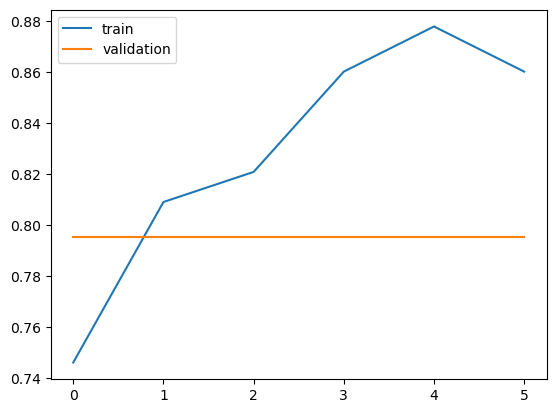

In [21]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

### 📋Cycle 1 결과
<img src="./images/cycle1.png" width='800px'>
<img src="./images/cycle1g.png" width='600px'>

🤔acc는 계속 오르는 반면 val_acc는 0.7953으로 일정하다.  
<strong>🔍이는 과적합으로 볼 수 있을 것 같다.</strong>

그렇다면, cycle 1에서 가장 높은 성능을 기록한 모델을 가지고 재훈련을 해보도록 하겠다.

가중치를 불러온다.

In [25]:
model.load_weights('./callback_files/weights.003-0.6333-0.7913.weights.h5')

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

그리고 혹시 모를 과적합을 방지하기 위해 batch_size를 줄여보도록 하겠다.

In [26]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=8,
    epochs=20,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - acc: 0.8276 - loss: 0.4338 - val_acc: 0.7953 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.8373 - loss: 0.4097 - val_acc: 0.7953 - val_loss: 1.0663 - learning_rate: 0.0010
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.8614 - loss: 0.3572 - val_acc: 0.7953 - val_loss: 1.0284 - learning_rate: 0.0010
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.8391 - loss: 0.3736 - val_acc: 0.7953 - val_loss: 0.8786 - learning_rate: 1.0000e-04
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - acc: 0.8655 - loss: 0.3033 - val_acc: 0.7953 - val_loss: 0.8035 - learning_rate: 1.0000e-04


#### 📋 Cycle 2 결과
<img src="./images/cycle2.png" width="800">

이번에도 validation_accuracy가 0.7953으로 일정한 것을 보아 아직까지 과적합인 듯 하다.

다음으로는 학습률 조절을 통해서 과적합 해소를 노려보도록 하겠다.

### 📌Cycle 3

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(500, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │          64,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │              

 Total params: 326,697 (1.25 MB)

 Trainable params: 325,929 (1.24 MB)

 Non-trainable params: 768 (3.00 KB)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(0.001), metrics=['acc'])

In [30]:
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle3_weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min',
    min_lr=1e-6, 
    verbose=1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [31]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    batch_size=8,
    epochs=20,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - acc: 0.6001 - loss: 0.9490 - val_acc: 0.8031 - val_loss: 0.6510 - learning_rate: 0.0010
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.7793 - loss: 0.4884 - val_acc: 0.7953 - val_loss: 0.5761 - learning_rate: 0.0010
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.8184 - loss: 0.4057 - val_acc: 0.7953 - val_loss: 0.5583 - learning_rate: 0.0010
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.7833 - loss: 0.4515 - val_acc: 0.7953 - val_loss: 0.6710 - learning_rate: 0.0010
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.8095 - loss: 0.4053 - val_acc: 0.7953 - val_loss: 0.9242 - learning_rate: 0.0010
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - acc: 0.7918 - loss: 0.4633 - val_acc: 0.8110 - val_loss: 0.6148 - learning_rate: 0.0010
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - acc: 0.8166 - loss: 0.4383 - val_acc: 0.7953 - val_loss: 0.6172 - learning_rate: 0.0010
Epoch 8/20
16/16 ━━━

### 📋 Cycle 3 결과
<img src="./images/cycle3.png" width="800">

- 이번에도 validation_accuracy가 0.7953으로 일정하다.  
  과적합이 해소되지 않은 듯 하다.

**이번에는 데이터 증강을 통해 과적합 해소를 노려보겠다.**

### 📌 Cycle 4 데이터 증강을 통한 과적합 해소

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))


x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# x = Flatten()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(500, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │     238,144,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,405,161 (909.44 MB)

 Trainable params: 238,405,161 (909.44 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    './datasets/egg/train/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    './datasets/egg/validation/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)


Found 508 images belonging to 2 classes.
Found 127 images belonging to 2 classes.


In [125]:
model.load_weights('./callback_files/cycle3_weights.009-0.4367-0.8465.weights.h5')

In [126]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(learning_rate=1e-04), loss='binary_crossentropy', metrics=['acc'])

In [127]:
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle4_weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.keras",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min',
    min_lr=1e-7, 
    verbose=1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [128]:
history = model.fit(
    train_generator,
    epochs=20,
    batch_size=8,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb],
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - acc: 0.8746 - loss: 0.3306 - val_acc: 0.8661 - val_loss: 0.3506 - learning_rate: 1.0000e-04
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - acc: 0.8747 - loss: 0.3069 - val_acc: 0.8583 - val_loss: 0.3679 - learning_rate: 1.0000e-04
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - acc: 0.8441 - loss: 0.3373 - val_acc: 0.8661 - val_loss: 0.3621 - learning_rate: 1.0000e-04
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - acc: 0.8760 - loss: 0.2907 - val_acc: 0.8740 - val_loss: 0.3230 - learning_rate: 1.0000e-04
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - acc: 0.8368 - loss: 0.3713 - val_acc: 0.8425 - val_loss: 0.4172 - learning_rate: 1.0000e-04
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - acc: 0.8587 - loss: 0.3074 - val_acc: 0.8504 - val_loss: 0.3808 - learning_rate: 1.0000e-04
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - acc: 0.8900 - loss: 0.2725 - val_acc: 0.8740 - val_loss: 0.3299 - learning_rate: 1.0

In [129]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.8106 - loss: 0.5404


[0.48877179622650146, 0.8301886916160583]

In [130]:
# 훈련 데이터 세트로 모델 성능 검증
model.evaluate(train_generator, batch_size=8, verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - acc: 0.8755 - loss: 0.2600


[0.2719557285308838, 0.8858267664909363]

In [131]:
# 검증 데이터 세트로 모델 성능 검증
model.evaluate(validation_generator, batch_size=8, verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - acc: 0.8709 - loss: 0.3979


[0.4300099313259125, 0.8582677245140076]

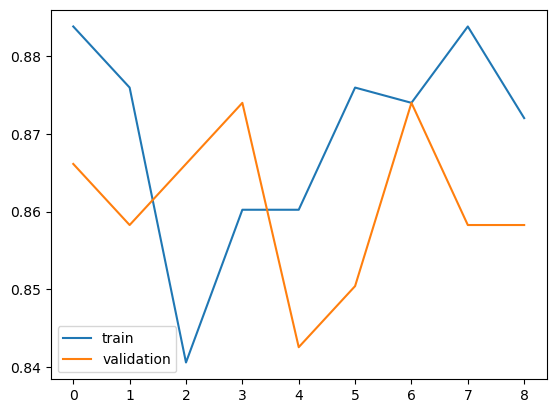

In [132]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

### 📋 Cycle 4 결과

<img src="./images/cycle4RE.png" width="800">
<img src="./images/cycle4bRE.png" width="800">


**과적합 해결 실패**

### 📌Cycle 5 파라미터 수 증가

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)

x = Dense(500, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 122, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 122, 122, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │     238,144,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,405,673 (909.45 MB)

 Trainable params: 238,405,417 (909.44 MB)

 Non-trainable params: 256 (1.00 KB)

In [21]:
# 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './datasets/egg/train/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    './datasets/egg/validation/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)


Found 508 images belonging to 2 classes.
Found 127 images belonging to 2 classes.


In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(learning_rate=1e-04), loss='binary_crossentropy', metrics=['acc'])

In [25]:
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle5_weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.keras",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min',
    min_lr=1e-7, 
    verbose=1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [26]:
history = model.fit(
    train_generator,
    epochs=20,
    batch_size=8,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb],
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - acc: 0.8859 - loss: 0.2387 - val_acc: 0.9055 - val_loss: 0.2723 - learning_rate: 1.0000e-05
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9326 - loss: 0.2038 - val_acc: 0.8898 - val_loss: 0.2693 - learning_rate: 1.0000e-05
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.9158 - loss: 0.2353 - val_acc: 0.8898 - val_loss: 0.2727 - learning_rate: 1.0000e-05
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - acc: 0.9014 - loss: 0.2131 - val_acc: 0.8976 - val_loss: 0.2377 - learning_rate: 1.0000e-05
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - acc: 0.9081 - loss: 0.2139 - val_acc: 0.8976 - val_loss: 0.2206 - learning_rate: 1.0000e-05
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - acc: 0.9093 - loss: 0.2314 - val_acc: 0.8898 - val_loss: 0.2321 - learning_rate: 1.0000e-05
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - acc: 0.9326 - loss: 0.2216 - val_acc: 0.9055 - val_loss: 0.2261 - learning_rate: 1.0

In [27]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.9299 - loss: 0.1847


[0.21453122794628143, 0.9119496941566467]

In [28]:
# 훈련 데이터 세트로 모델 성능 검증
model.evaluate(train_generator, batch_size=8, verbose=1)

64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - acc: 0.9326 - loss: 0.1528


[0.1530778557062149, 0.9370078444480896]

In [29]:
# 검증 데이터 세트로 모델 성능 검증
model.evaluate(validation_generator, batch_size=8, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 982ms/step - acc: 0.9028 - loss: 0.2146


[0.22878289222717285, 0.9055117964744568]

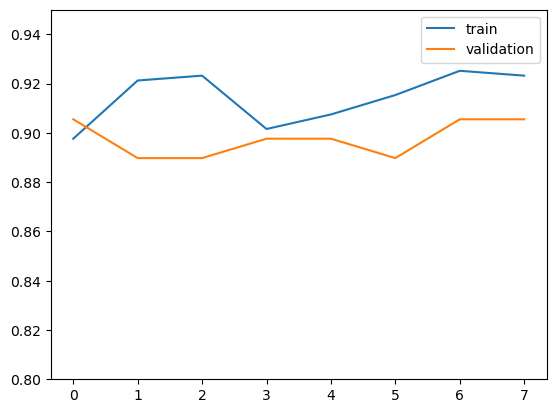

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.ylim(0.8, 0.95)
plt.legend()
plt.show()

### 📋 Cycle 5 결과

<img src="./images/cycle5.png" width="800" style="margin-bottom:50px; margin-top:50px">
<img src="./images/cycle5b.png" width="800" style="margin-bottom:50px">
<img src="./images/cycle5g.png" width="600">

- 훈련 데이터의 정확도와 검증 데이터의 정화도가 서로 비슷 하게 유지되고 있다.  
  이는, 과적합 없이 잘 학습되고 있다는 뜻이다.
- 훈련 데이터의 손실값과 검증 데이터의 손실값도 비슷한 수준에서 유지되고 있으며,
  이는 모델이 두 데이터에서 모두 좋은 성능을 발휘하고 있다는 뜻이다.

**위의 결과를 바탕으로 과적합 없이 잘 훈련이 되었다고 볼 수 있다.**

### 📌Cycle 6 실제 예측

In [71]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model

IMAGE_SIZE = 244

# 루트 디렉토리 및 클래스 이름 정의
root = './datasets/egg/original/'
class_names = ['Damaged', 'Not Damaged']

In [75]:
# 모델 로드
model = load_model('./callback_files/cycle5_weights.004-0.2377-0.9016.weights.keras')

In [76]:
# 모든 서브 디렉토리에서 PNG 파일 검색 및 예측
def load_and_preprocess_image(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    return resized_image

In [77]:
# 결과 저장용 리스트
results = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if file.endswith('.png'):
            image_path = os.path.join(subdir, file)
            image = load_and_preprocess_image(image_path)
            image = np.expand_dims(image, axis=0)  # 배치 차원 추가
            prediction = model.predict(image, batch_size=8)
            predicted_class_index = np.argmax(prediction[0])  # 예측된 클래스 인덱스
            predicted_class = class_names[predicted_class_index]
            results.append((file, predicted_class))

# 결과 출력
for filename, predicted_class in results:
    print(f'Image: {filename}, Predicted: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━

### 📋Cycle 6 결과

- 모든 데이터들을 "Dameged" 라고 예측 했다.
- 데이터의 분포가 문제인 듯 하다.
- 언더 샘플링으로 데이터 분포를 맞춰보도록 하겠다.